# Senti-tech Assessment - Data Exploration

##  Step 1: Importing The Data


To work with the data, we must convert the csv file into a pandas dataframe so that we may visualise the data


In [177]:
import pandas as pd
from matplotlib import pyplot as plt

#load dataframe from csv "patient_table.csv"
filepath = "./patient_table.csv"
df = pd.read_csv(filepath)

#drop the unnecessary first column 
df = df.drop(df.columns[0], 1)
print(df.head())


  diagnosis   age sex   bmi  pt_num loc     scope
0      COPD  85.0   F  17.1     130  Ar  AKGC417L
1      COPD  85.0   F  17.1     130  Ll  AKGC417L
2      COPD  85.0   F  17.1     130  Lr  AKGC417L
3      COPD  85.0   F  17.1     130  Pl  AKGC417L
4      COPD  85.0   F  17.1     130  Al  AKGC417L


## Step 2:  Variable Identification

The data contains:
 - age - continuous numerical,
    
 - sex - discrete - M/F, 
    
 - bmi - continuous numerical
    
 - location on chest of the sample - one of several categories (shown below)
    
 - model of digital sethoscope - one of several categories (shown below)
        
 - diagnosis - one of several categories (shown below)

For this dataset, the target variable is diagnosis, we want to be able to predict a possible diagnosis based on other metadata available to us. 

This means we must find relationships between other variables that correlate strongly with diagnosis. 


In [178]:
#write code to show variable type and range for each part

print("possible values for sex: \n", df.sex.dropna().unique())
print("\n")
print("range of values for bmi: \n", df.bmi.min(), "-", df.bmi.max())
print("\n")
print("range of values for age: \n", df.age.min(), "-", df.age.max())
print("\n")
print("possible values for location on chest: \n", df["loc"].unique())
print("\n")
print("possible values for stethoscope: \n", df.scope.unique())
print("\n")
print("possible values for diagnosis: \n", df.diagnosis.unique())



possible values for sex: 
 ['F' 'M']


range of values for bmi: 
 13.1 - 53.5


range of values for age: 
 0.25 - 93.0


possible values for location on chest: 
 ['Ar' 'Ll' 'Lr' 'Pl' 'Al' 'Pr' 'Tc']


possible values for stethoscope: 
 ['AKGC417L' 'Litt3200' 'Meditron' 'LittC2SE']


possible values for diagnosis: 
 ['COPD' 'URTI' 'Pneumonia' 'Healthy' 'Bronchiolitis' 'Bronchiectasis'
 'Asthma' 'LRTI']


## Step 3: Data Integrity Checks

Before we perform data exploration, we must perform various data integrity checks:

1. Checking that each patient ID has the same BMI, sex, diagnosis and age
    - Ensure data integrity, allowing us to find relationships between patient attributes as a whole and diagnosis given


2. Dealing with missing data (to be done as required)
    - We must remove data where values are missing during analysis. In this case, when exploring information relating to BMI, Age or Sex of patients
    

In [179]:
#get all unique patient records by dropping location data...
#...then checking there are no duplicate patientIDs

unique_patient_df = ((df.drop(['loc', 'scope'], 1)).drop_duplicates()).sort_values(by="pt_num")

if unique_patient_df.pt_num.values.tolist() == list(set(unique_patient_df.pt_num.values.tolist())):
    print("Diagnosis, BMI, Age and Sex for each patient is consistent")   
else:
    print("Diagnosis, BMI, Age and Sex for each patient is inconsistent")

Diagnosis, BMI, Age and Sex for each patient is consistent


## Step 4: Univariate Analysis

In this step, we will explore each variable individually, this will allow us to highlight any outliers or general trends for a particular variable in the dataset.

Since we confirmed that each unique patient in the dataset has the same corresponding attributes except for stethoscope and location, we can ignore the duplicate entries during univariate analysis for the other attributes

For continuous data such as Age and BMI, we will use histograms and boxplots. 

For discrete data such as diagnoisis, stethoscope and location, we will use frequency tables and charts.

The following information is shown below
1. The distribution of patients' Age in the dataset
2. The distribution of patients' BMI in the dataset
3. The frequency table of patients' Sex
4. The frequency table of unique patient diagnoses
5. The frequency table of digital stethoscopes used
6. The frequency table of chest locations used 
7. The distribution in the number of entries (number of tests) each patient has.



Text(0.5, 0.98, 'Univariate Results')

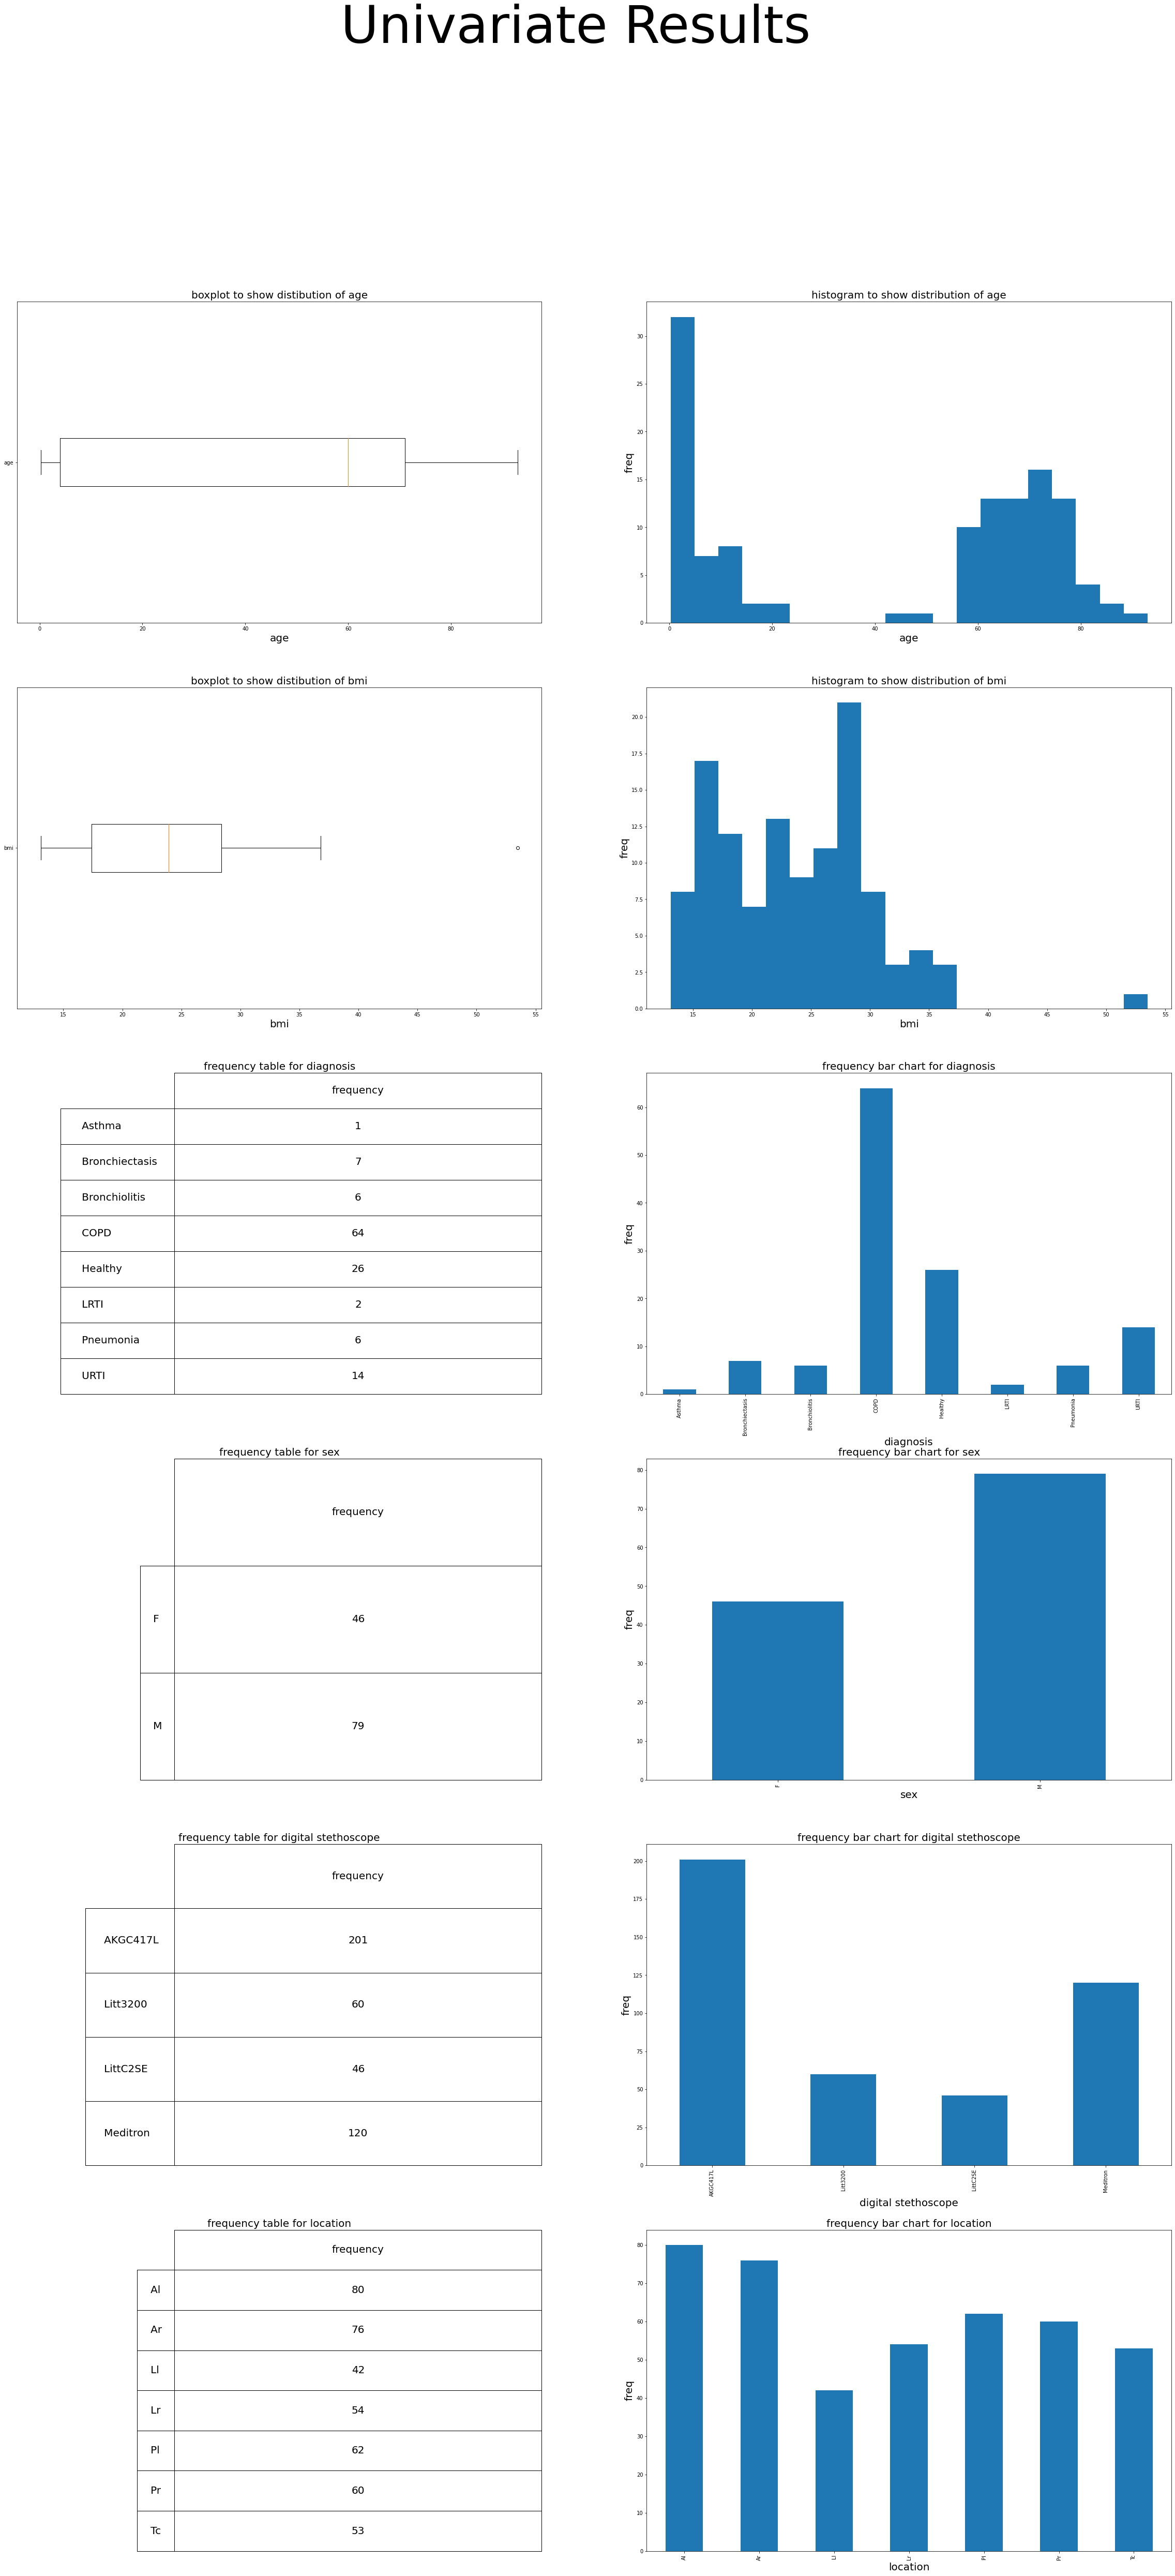

In [340]:

fontsize = 20
unique_attr = ["age", "bmi", "diagnosis", "sex"]

other_attr = ["scope", "loc"]
contin = ["age", "bmi"]

name_dict = {"loc":"location", "scope":"digital stethoscope"}

all_attr = unique_attr + other_attr


fig, axs = plt.subplots(ncols=2, nrows=len(all_attr), figsize=(40,80))


for r, attr in enumerate(all_attr):
    
    if attr in unique_attr:
        p_df = unique_patient_df
    else:
        p_df = df
    
    if attr in name_dict.keys():
        name = name_dict[attr]
    else:
        name = attr
    
    if attr in contin:
        
        p_df = p_df[attr].dropna()
        axs[r][0].boxplot([p_df], labels=[attr], vert=False)
        axs[r][0].set_title("boxplot to show distibution of "+name, fontsize=fontsize)
        axs[r][0].set_xlabel(name, fontsize=fontsize)
        
        axs[r][1].hist(p_df, bins=20)
        axs[r][1].set_title("histogram to show distribution of "+name, fontsize=fontsize)
        axs[r][1].set_xlabel(name, fontsize=fontsize)
        axs[r][1].set_ylabel("freq", fontsize=fontsize)
        
    else:
        
        p_df = p_df[attr].value_counts().sort_index()
        
        p_df.rename("frequency", inplace=True)
        p_df = pd.DataFrame(p_df)
        p_df.index.rename(attr, inplace=True)

        axs[r][0].axis("off")
        tbl = axs[r][0].table(
            cellText = p_df.values,
            rowLabels = "   " + p_df.index + "   ",
            bbox = [0.3,0,0.7,1],
            colLabels=p_df.columns,
            colWidths = [0.15, 0.25],
            cellLoc = 'center'
        ) 
        
        axs[r][0].set_title("frequency table for "+name, fontsize=fontsize)
        
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(20)
        tbl.scale(4, 4)
        
        p_df.plot(ax=axs[r][1], kind="bar")
        axs[r][1].set_xlabel(name, fontsize=fontsize)
        axs[r][1].set_ylabel("freq", fontsize=fontsize)
        axs[r][1].get_legend().remove()
        axs[r][1].set_title("frequency bar chart for "+name, fontsize=fontsize)

fig.suptitle("Univariate Results", fontsize=100)

Text(0.5, 1.0, 'frequency bar chart for number of tests per patient')

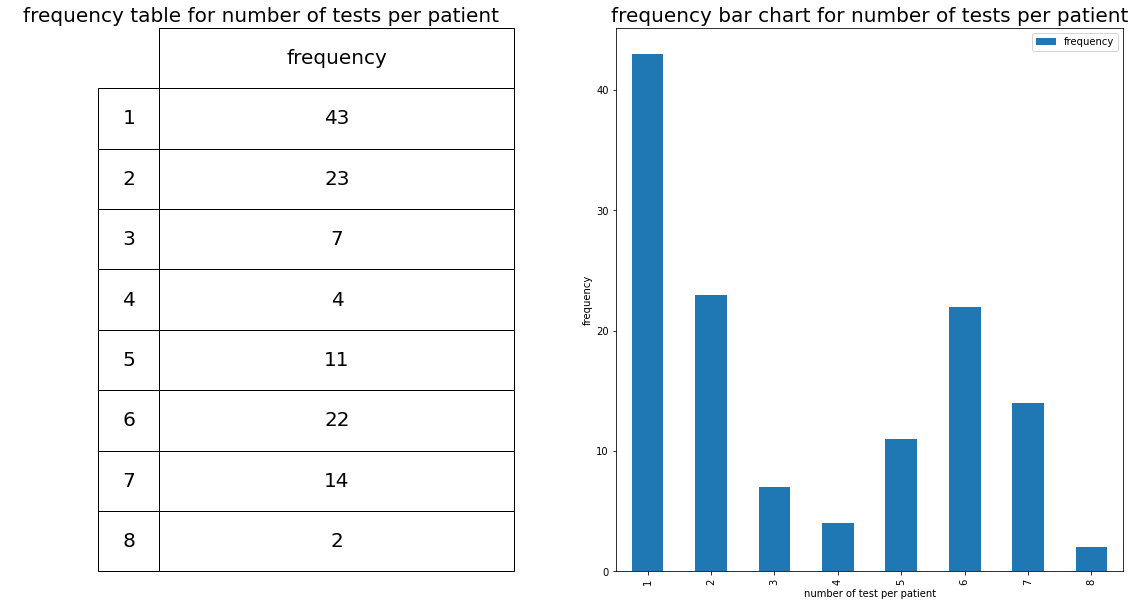

In [294]:
#frequency table for each pt_num
#number of occurrances of pt_num corresponds to tests done

fig, axs = plt.subplots(ncols=2, figsize=(20,10))

pt_nums_freq_df = df["pt_num"].value_counts()

freqs = (pt_nums_freq_df.value_counts()).sort_index()




freqs.rename("frequency", inplace=True)
freqs = pd.DataFrame(freqs)
freqs.index.rename("number_of_entries", inplace=True)

axs[0].axis("off")

tbl = axs[0].table(
    cellText = freqs.values,
    rowLabels = "   " + freqs.index.astype(str) + "   ",
    bbox = [0.3,0,0.7,1],
    colLabels=freqs.columns,
    colWidths = [0.15, 0.25],
    cellLoc = 'center'
) 
axs[0].set_title("frequency table for number of tests per patient", fontsize=fontsize)
        
tbl.auto_set_font_size(False)
tbl.set_fontsize(20)
tbl.scale(4, 4)



freqs.plot(ax=axs[1], kind="bar")
axs[1].set_ylabel("frequency")
axs[1].set_xlabel("number of test per patient")
axs[1].set_title("frequency bar chart for number of tests per patient", fontsize=fontsize)

## Step 4 Results and Outlier Removal

Age:
We can see that the patient records are split into 2 distinct age brackets
    - what effect does this have?
    - what should we do going forward with this information?
    - median age for males is higher
 
Sex:
We can see that the data is skewed towards males. 
    - what effect does this have?
    - what should we do going forward with this information

BMI 
bmi is uniform - meaning that it likely does not have an effect


## Step 5: Multivariate Analysis

In this step, we will explore the relationship between two variables. We aim to find a significant correlation between two variables which can help us choose inputs for a model that will help predict the possible diagnosis.

The following information is shown:

8. Box plots to show Age of patients with a specific diagnosis
9. Box plot to show BMI of patients with a specific diagnosis 
10. Box plot to show number of tests done on patients with a specific diagnosis
11. Stacked bar graph to show breakdown of test location for specific diagnoses
12. Stacked bar graph to show breakdown of which stethoscope was used for which diagnosis
13. Stacked bar graph to show breakdown of which gender patients were with a specific diagnosis 




Text(0.5, 0.98, 'Multivariate results - boxplots')

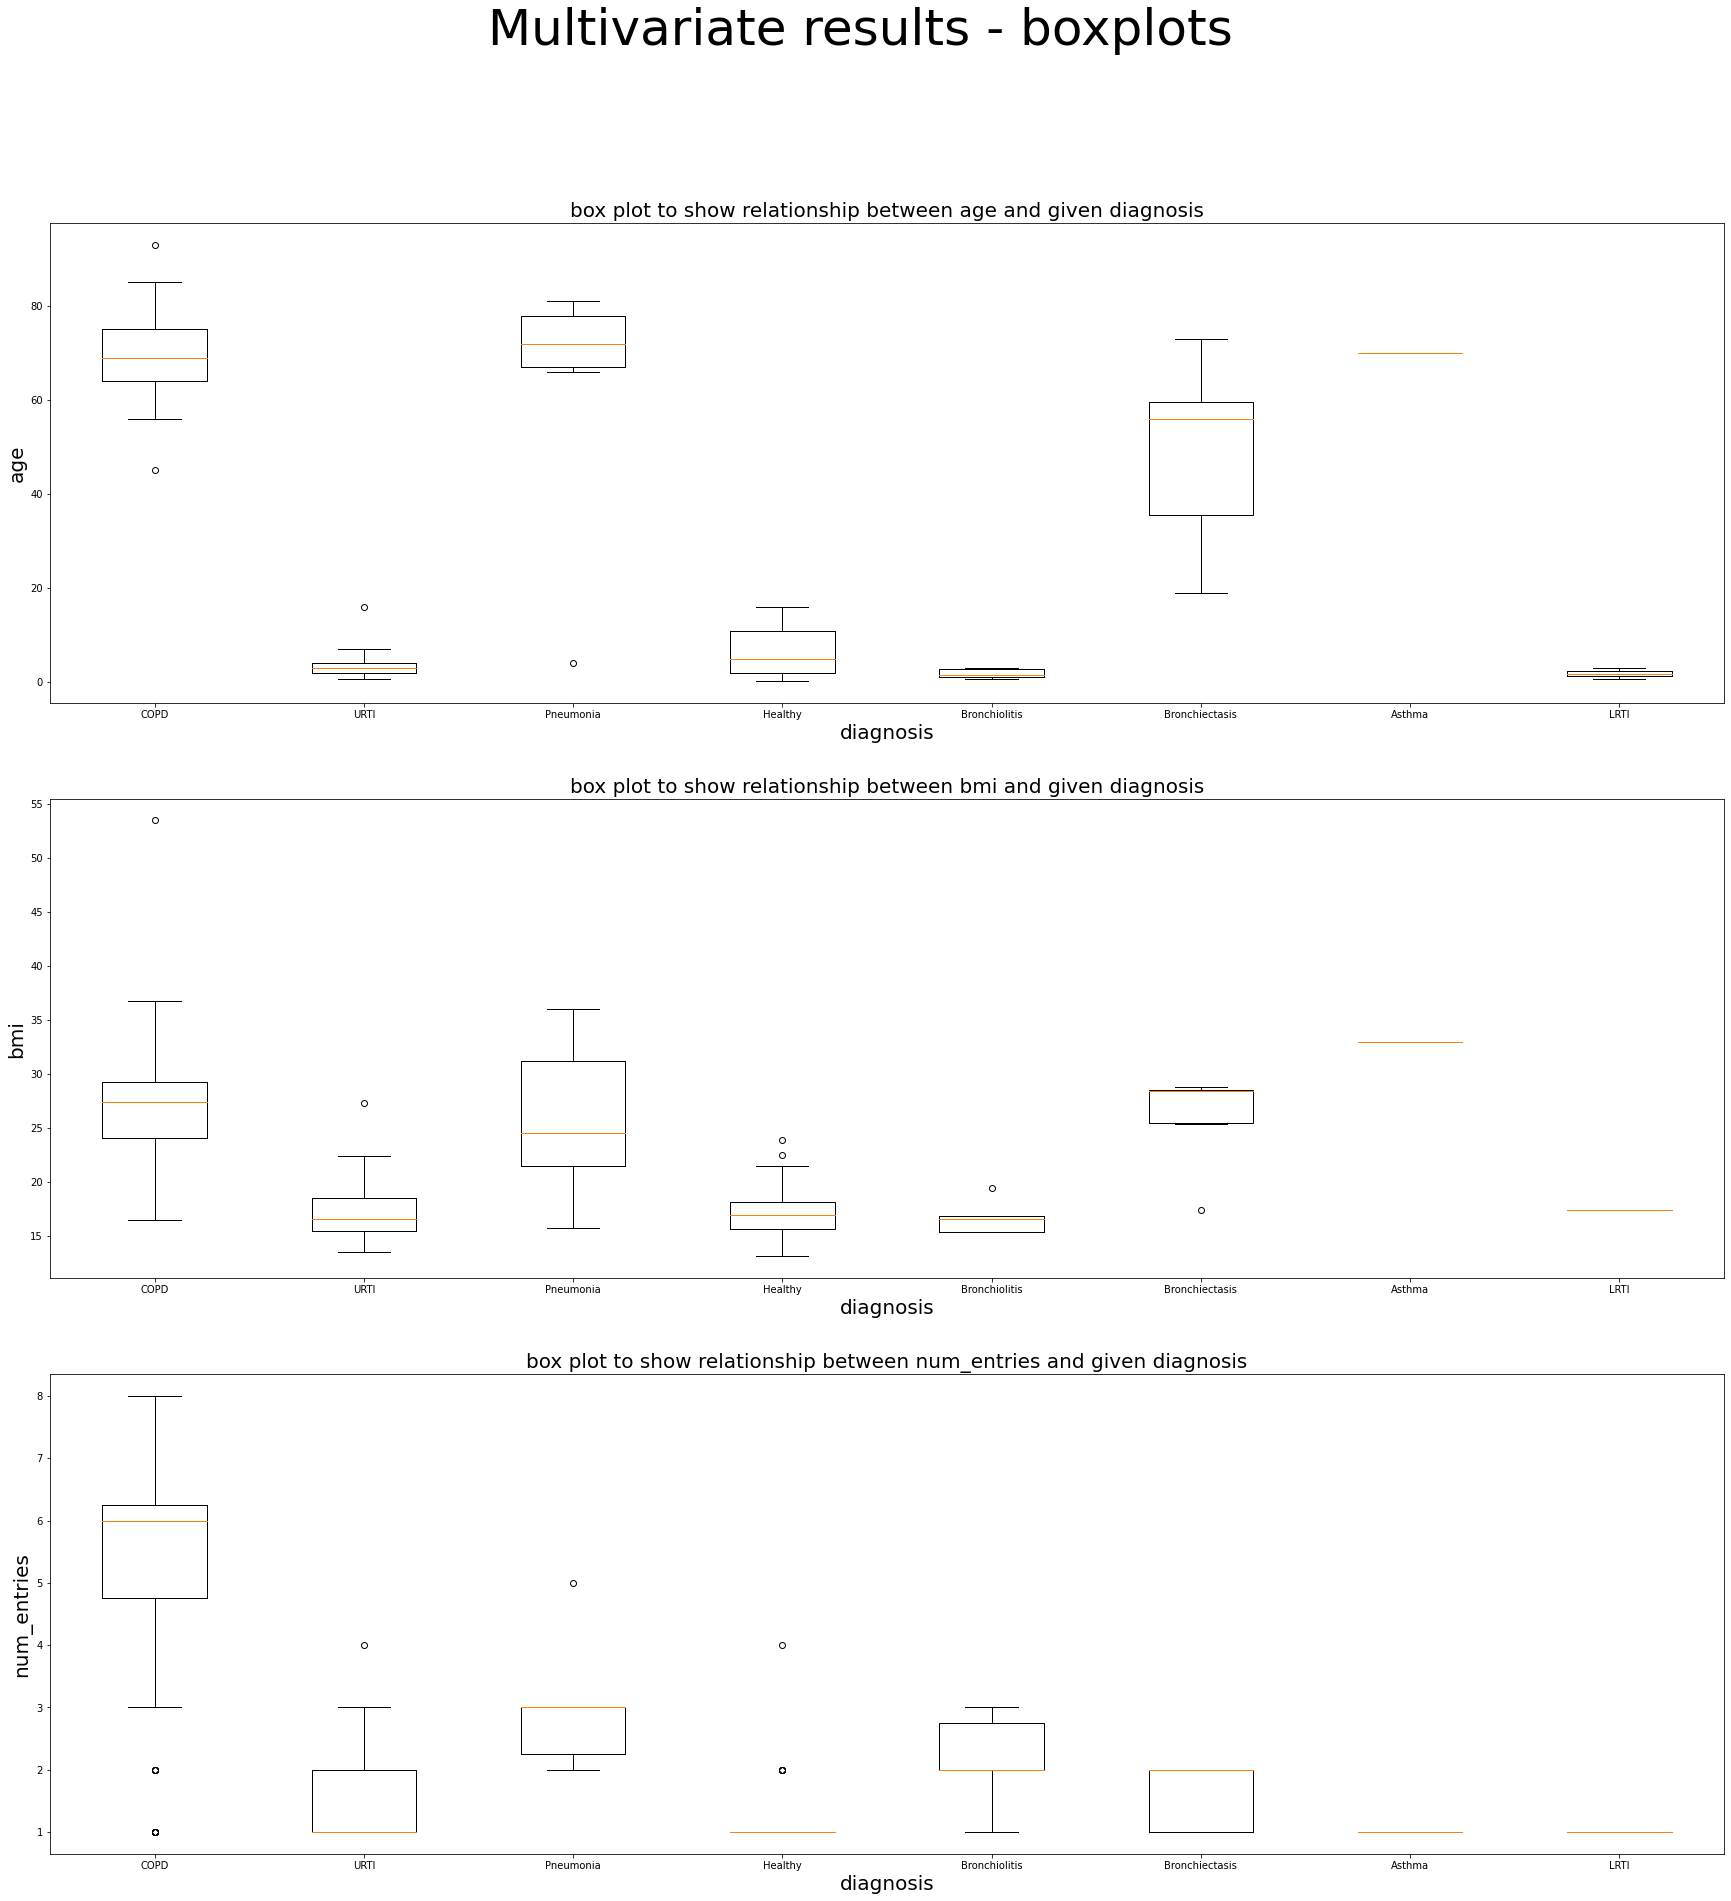

In [332]:
attrs = ["age", "bmi", "num_entries"]

fig, axs = plt.subplots(ncols=1, nrows=len(attrs), figsize=(30,30))

all_diagnoses = df.diagnosis.unique().tolist()

for r, attr in enumerate(attrs):
    
    if attr == "num_entries":
        pt_nums_freq_df = df["pt_num"].value_counts()
        pt_nums_freq_df.rename("num_entries", inplace=True)
        pt_nums_freq_df = pd.DataFrame(pt_nums_freq_df)
        pt_nums_freq_df.index.rename("pt_num", inplace=True)
        
        
        p_df = pd.merge(
            unique_patient_df[["pt_num", "diagnosis"]],
            pt_nums_freq_df,
            how = "outer", on = "pt_num"
        )
        
    else:
        p_df = (unique_patient_df[[attr, 'diagnosis']]).dropna(how='any', subset=[attr])
        
    box_plot_df_list = []
    for diagnosis in all_diagnoses:
        box_plot_df_list.append(
            p_df.loc[p_df["diagnosis"] == diagnosis][attr]
        )
        
    axs[r].boxplot(
        box_plot_df_list,
        labels = all_diagnoses
    )
    axs[r].set_xlabel("diagnosis", fontsize=fontsize)
    axs[r].set_ylabel(attr, fontsize=fontsize)
    axs[r].set_title("box plot to show relationship between "+ attr +" and given diagnosis", fontsize=fontsize)
    
fig.suptitle("Multivariate results - boxplots", fontsize=50)




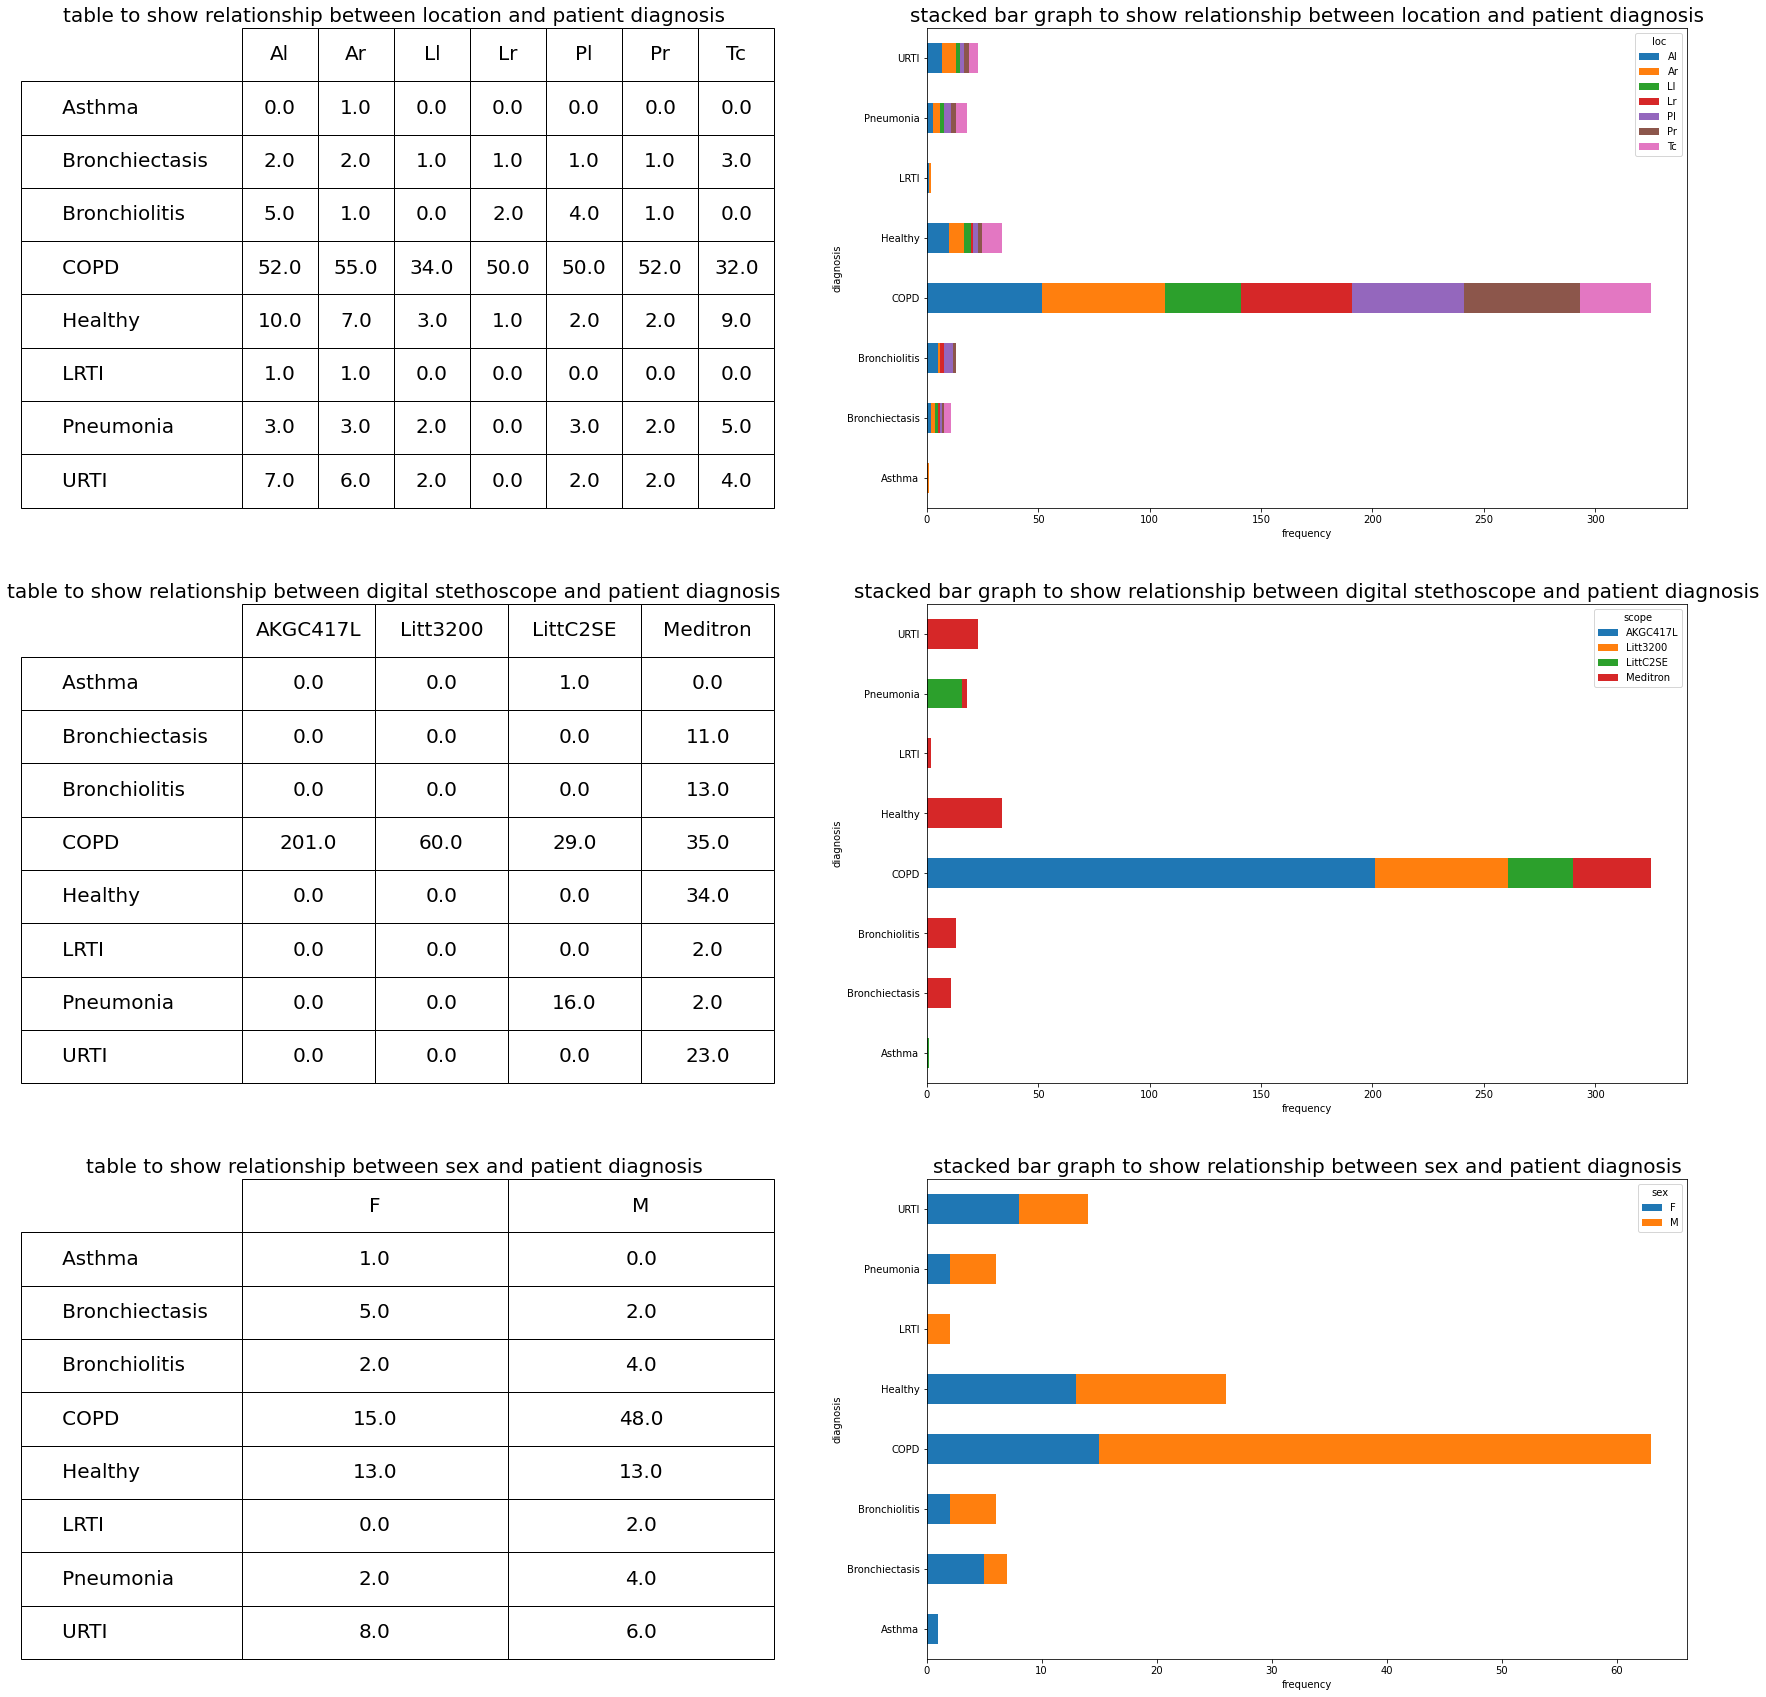

In [341]:
attrs = ["loc", "scope", "sex"]
namedict = {"loc":"location", "scope":"digital stethoscope"} 

fig, axs = plt.subplots(ncols=2, nrows=len(attrs), figsize=(30,30))

all_diagnoses = df.diagnosis.unique().tolist()

for r, attr in enumerate(attrs):
    
    if attr == "sex":
        p_df = (unique_patient_df[["sex", "diagnosis"]]).dropna(how='any', subset=["sex"])
    else:
        p_df = df[[attr, "diagnosis"]]
  
    grouped_df = p_df.groupby(["diagnosis", attr])["diagnosis"].count().unstack(attr).fillna(0)
    
    axs[r][0].axis("off")

    tbl = axs[r][0].table(
        cellText = grouped_df.values,
        rowLabels = "   " + grouped_df.index.astype(str) + "   ",
        bbox = [0.3,0,0.7,1],
        colLabels=grouped_df.columns,
        cellLoc = 'center'
    ) 
    axs[r][0].set_title("table to show relationship between {0} and patient diagnosis".format(namedict[attr] if attr in namedict.keys() else attr), fontsize=fontsize)
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(20)
    tbl.scale(4, 4)
    
    
    grouped_df.plot(kind="barh", stacked=True, ax=axs[r][1])
    axs[r][1].set_xlabel("frequency")
    axs[r][1].set_title("stacked bar graph to show relationship between {0} and patient diagnosis".format(namedict[attr] if attr in namedict.keys() else attr), fontsize=fontsize)

    
    
    
    
    
    
    



## Step 5 Results

What can we see from this graph? 
Should we eliminate Asthma, LRTI etc?
Why is COPD the most common?
